In [1]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

import konlpy
okt = konlpy.tag.Okt()

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['figure.figsize'] = 8,8
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [2]:
news_df = pd.read_excel("./inha_3month.xlsx", engine = 'openpyxl')

## 언론사 확인

In [3]:
press = bkp.press_counter(news_df)

<AxesSubplot: xlabel='기사', ylabel='언론사'>

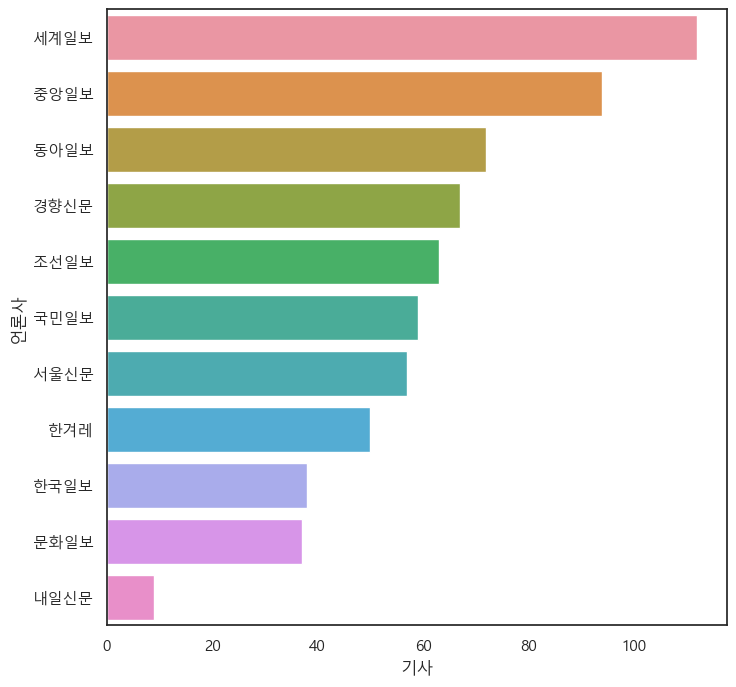

In [4]:
sns.barplot(data = press, x = "기사", y = "언론사")

### 포토 기사 필터링

In [5]:
filt = news_df[news_df['제목'].str.contains('포토')].index
news_df.drop(filt, inplace=True)
news_df.reset_index(drop = True, inplace = True)

## 키워드 빈도

In [6]:
lis = bkp.keywords_list(news_df["키워드"])

In [7]:
key = bkp.keyword_parser(lis)

In [8]:
key = bkp.duplication_remover(key)

In [9]:
key_words = bkp.word_counter(key)
key_words = bkp.counter_to_DataFrame(key_words)

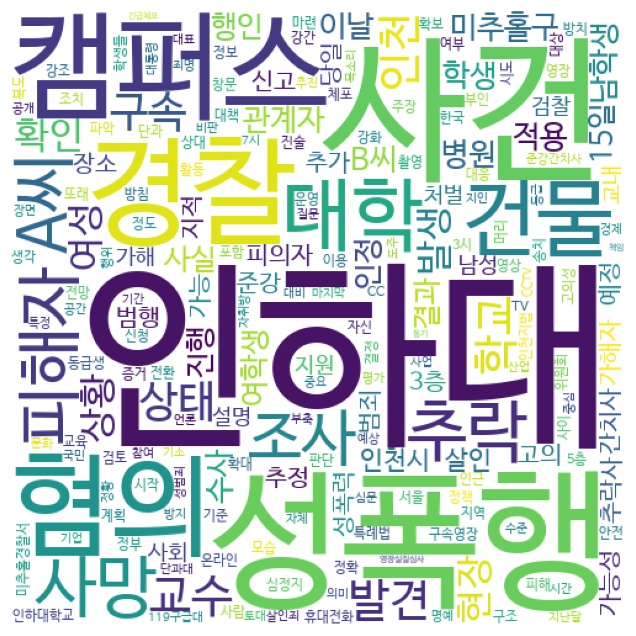

In [10]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(key_words.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (8, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 언론사 별 단어 빈도 분석

In [11]:
news_df['언론사'].unique()

array(['조선일보', '국민일보', '중앙일보', '한겨레', '서울신문', '내일신문', '경향신문', '문화일보',
       '동아일보', '세계일보', '한국일보'], dtype=object)

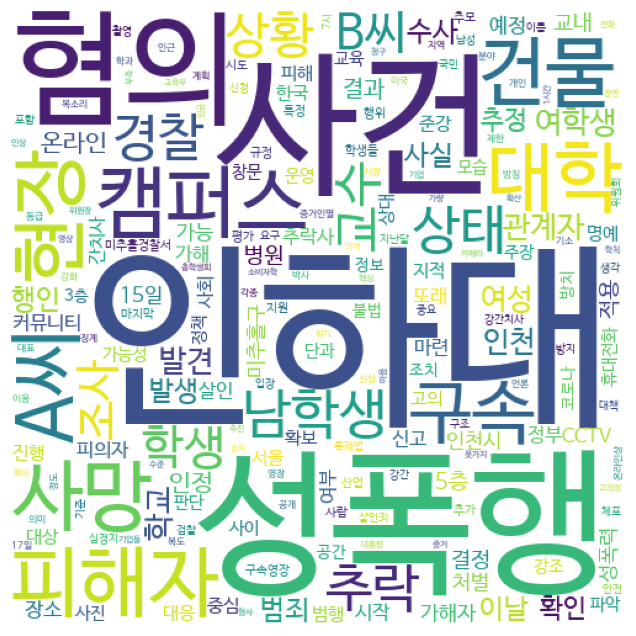

In [12]:
bkp.press_keywords_wordcloud(news_df, '조선일보')

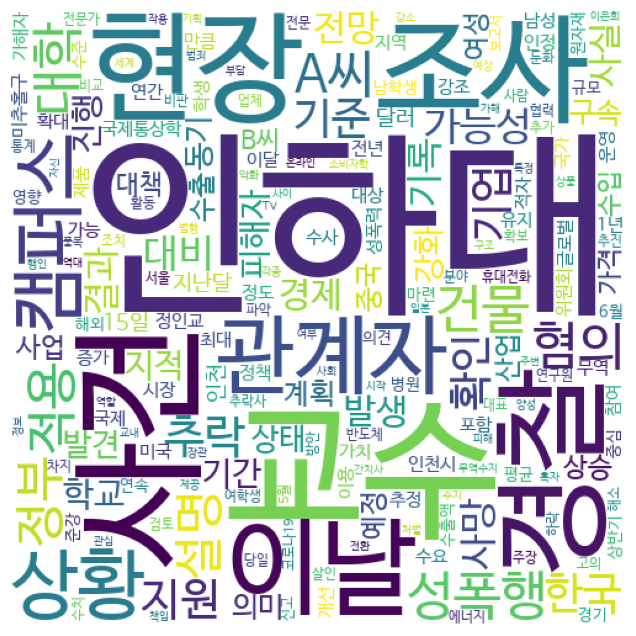

In [15]:
bkp.press_keywords_wordcloud(news_df, '중앙일보')

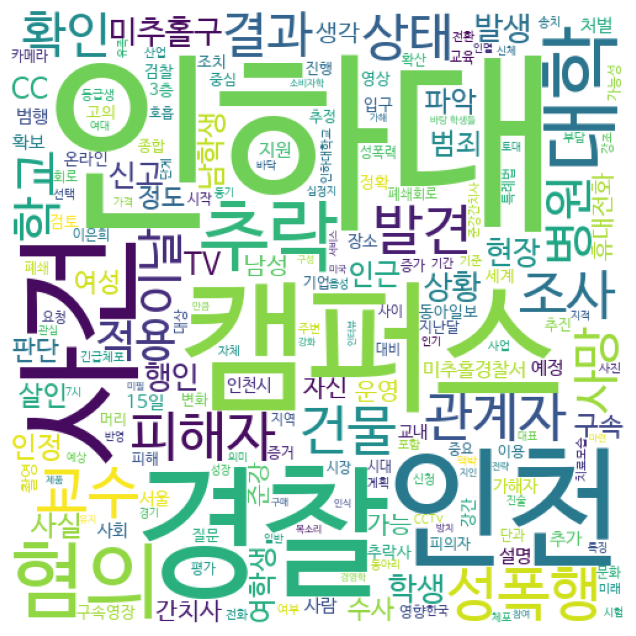

In [16]:
bkp.press_keywords_wordcloud(news_df, '동아일보')

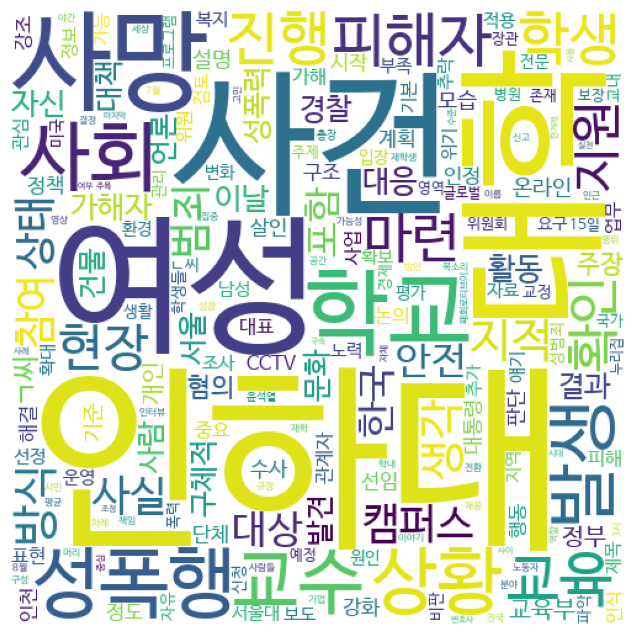

In [17]:
bkp.press_keywords_wordcloud(news_df, '한겨레')

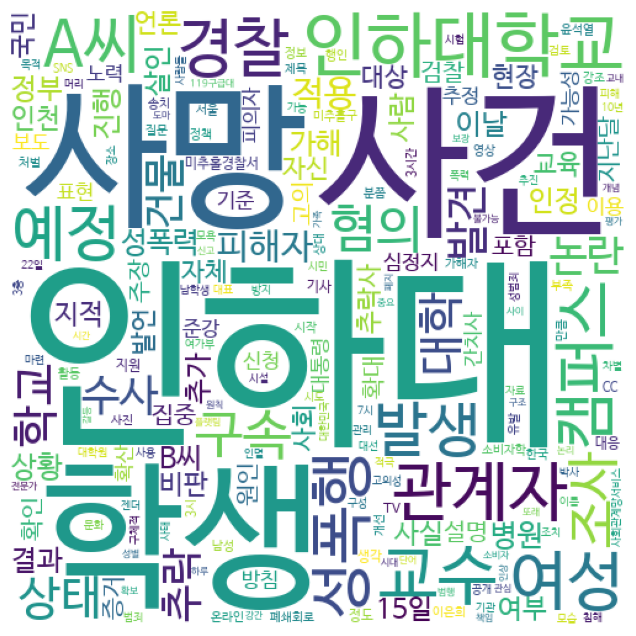

In [18]:
bkp.press_keywords_wordcloud(news_df, '경향신문')

## 제목 단어 빈도 분석

In [19]:
title = bkp.keywords_list(news_df['제목'])

In [20]:
words = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    words.append(word)

In [21]:
news_titles = bkp.word_counter(words)
news_titles = bkp.counter_to_DataFrame(news_titles)

In [22]:
news_titles= news_titles[news_titles["단어"].str.len() >=2].reset_index(drop = True)

In [23]:
news_titles = news_titles.head(20)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

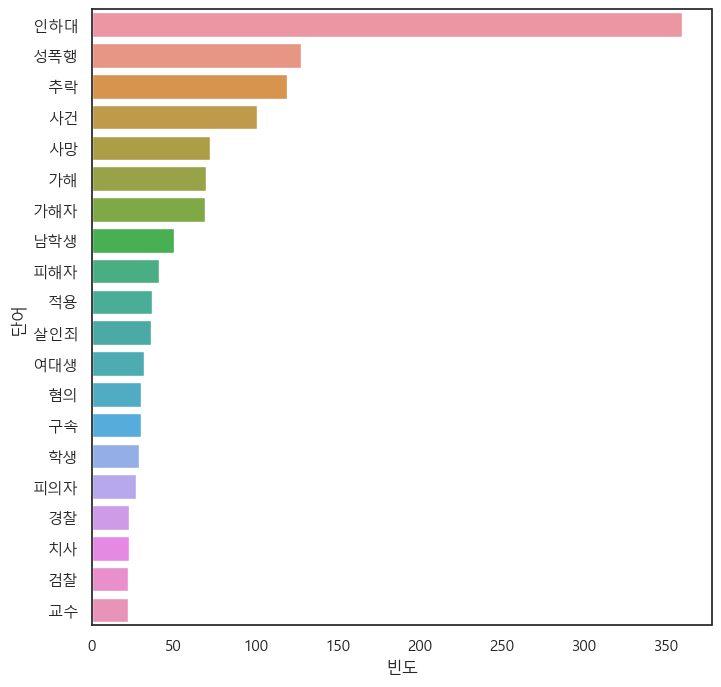

In [24]:
sns.barplot(data = news_titles, x = '빈도', y = '단어')

## 키워드 분석 with Bigram

In [25]:
from nltk import bigrams

In [26]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '성폭행':
            wor.append(t[1])
        elif t[1] == '성폭행':
            wor.append(t[0])

In [35]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [36]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

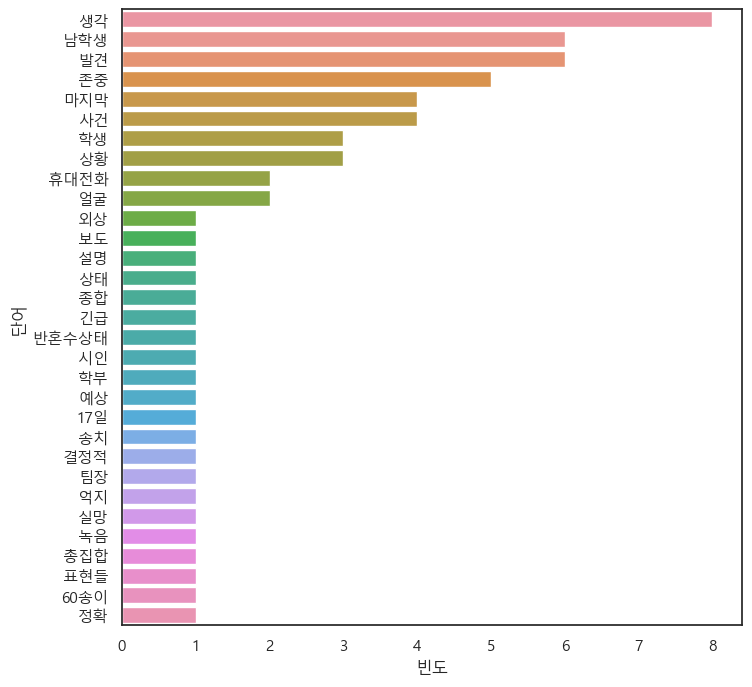

In [37]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

In [38]:
wor = []

for sentence in key:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '여대생':
            wor.append(t[1])
        elif t[1] == '여대생':
            wor.append(t[0])

In [39]:
counter = {}

for word in wor:
    if not word in counter:
        counter[word] = 1
    elif word in counter:
        counter[word] +=1

In [40]:
vio_df = bkp.counter_to_DataFrame(counter)
vio_df = vio_df[vio_df['단어'].str.len() >= 2].reset_index(drop = True)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

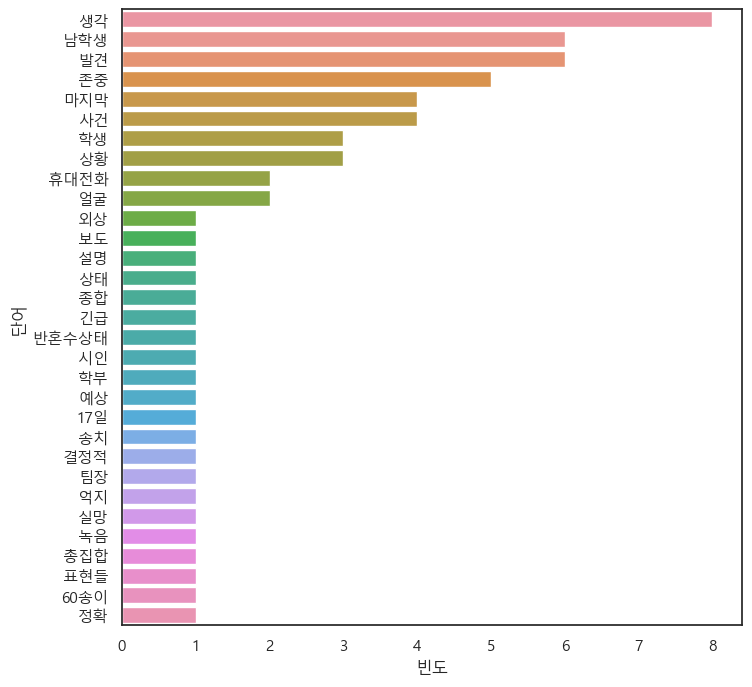

In [41]:
sns.barplot(data = vio_df, x = '빈도', y = '단어')

## 제목 분석 with Bigram

In [42]:
title = bkp.keywords_list(news_df['제목'])

In [43]:
bot = []
for i in range(len(title)):
    word = okt.nouns(title[i])
    bot.append(word)

In [44]:
wors = []

for sentence in bot:
    bigram = bigrams(sentence)
    for t in bigram:
        if t[0]== '인하대':
            wors.append(t[1])
        elif t[1] == '인하대':
            wors.append(t[0])

In [45]:
counter = {}

for word in wors:
    if not word in counter:
        counter[word] = 1
    if word in counter:
        counter[word] +=1
        
title_df = bkp.counter_to_DataFrame(counter)
title_df = title_df[title_df['단어'].str.len() >= 2].reset_index(drop = True)

<AxesSubplot: xlabel='빈도', ylabel='단어'>

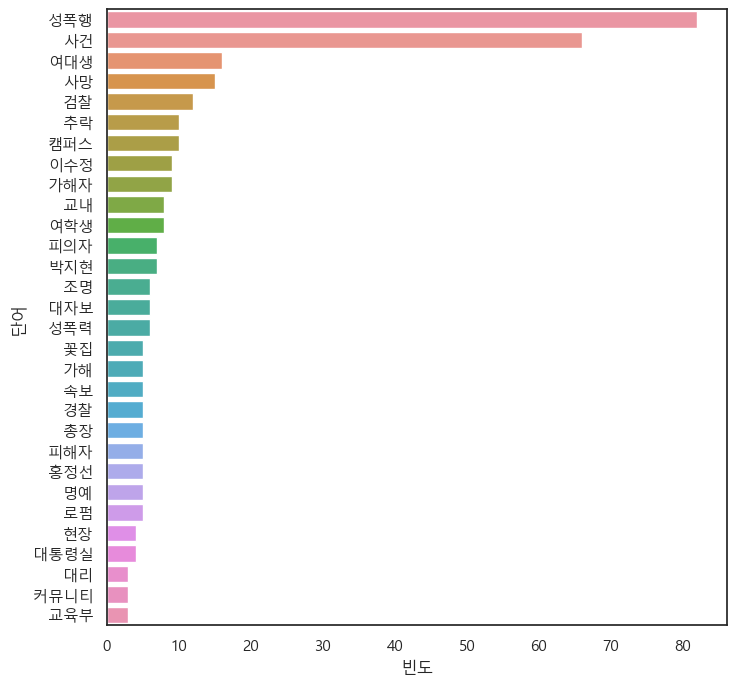

In [47]:
title_df = title_df.head(30)
sns.barplot(data = title_df, x = '빈도', y = '단어')

## 특정 단어 사용 고빈도 언론사 추출

In [48]:
news_df[news_df['제목'].str.contains('여대생')].groupby('언론사').size()

언론사
경향신문    1
동아일보    5
문화일보    1
서울신문    6
세계일보    8
조선일보    3
중앙일보    8
dtype: int64

In [49]:
news_df[news_df['본문'].str.contains('여대생')].groupby('언론사').size()

언론사
경향신문     2
국민일보     2
동아일보     8
문화일보     5
서울신문     6
세계일보    16
조선일보     5
중앙일보     5
한겨레      2
dtype: int64

In [50]:
news_df[news_df['제목'].str.contains('강간')].groupby('언론사').size()

언론사
경향신문    2
국민일보    5
동아일보    3
문화일보    1
서울신문    5
세계일보    1
조선일보    6
중앙일보    3
한겨레     1
dtype: int64

## t-SNE

In [51]:
text = news_df['키워드']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).toarray()

In [77]:
from sklearn.preprocessing import Normalizer

nor = Normalizer()
norvec = nor.fit_transform(vec)

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(norvec)

tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


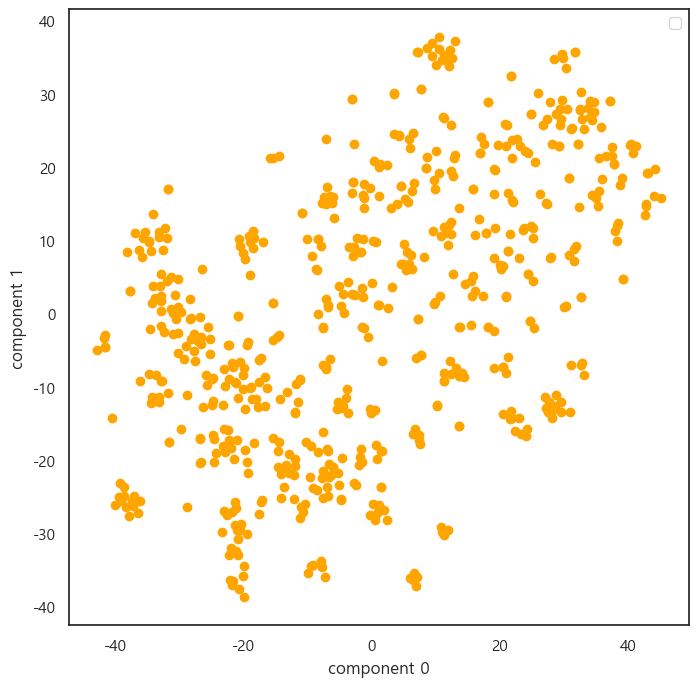

In [79]:
plt.scatter(tsne_df['component 0'], tsne_df['component 1'], color = 'orange')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

문서 간 밀접 여부 파악이 어려움

Clustering의 정확도가 낮을 것으로 예상

# Topic Modeling

In [55]:
news_words = bkp.keyword_parser(news_df['키워드'])

In [56]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [57]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict, passes=20, iterations=100)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

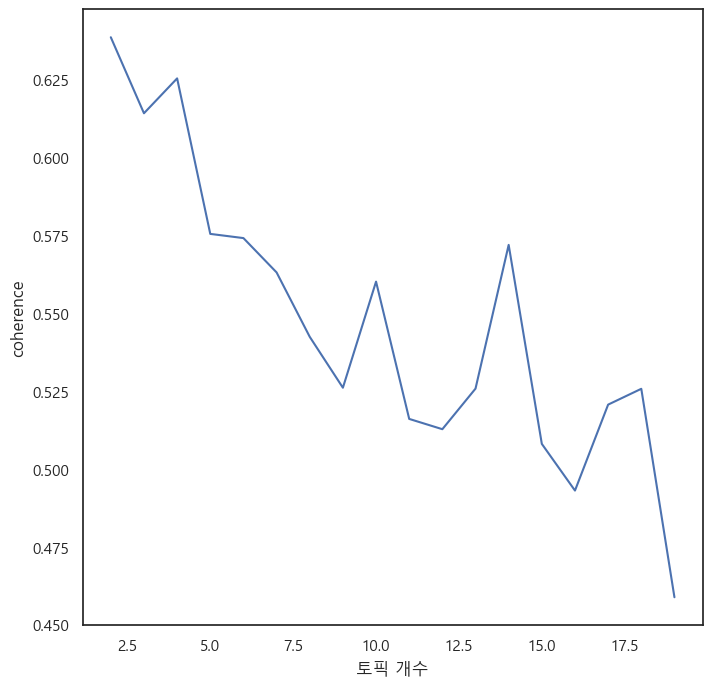

In [58]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

최적 Topic 갯수는 2개로 나타남

그러나 분석을 위해 2번째로 높은 값인 4개를 하이퍼파라미터로 지정

In [60]:
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=20, iterations=100, random_state=10)
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.007*"중국" + 0.007*"교수" + 0.006*"수출" + 0.006*"인하대" + 0.005*"사회" + 0.005*"무역" + 0.005*"적자" + 0.004*"기업"')
(1, '0.007*"대학" + 0.007*"정부" + 0.006*"교육" + 0.006*"가격" + 0.005*"전형" + 0.005*"인하대" + 0.004*"대통령" + 0.004*"정책"')
(2, '0.024*"인하대" + 0.024*"A씨" + 0.021*"경찰" + 0.018*"혐의" + 0.018*"사건" + 0.018*"B씨" + 0.016*"피해자" + 0.016*"건물"')
(3, '0.005*"정부" + 0.004*"교수" + 0.004*"대학" + 0.004*"지원" + 0.003*"미국" + 0.003*"중국" + 0.003*"인하대" + 0.002*"정책"')


In [63]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [64]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [65]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

,뉴스 번호,주요 토픽,주요 토픽 비중,토픽 별 비중
0,0,0,0.9941,"[(0, 0.99406594)]"
1,1,0,0.9952,"[(0, 0.9952157)]"
2,2,1,0.7678,"[(0, 0.23053786), (1, 0.7678185)]"
3,3,3,0.9971,"[(3, 0.9971432)]"
4,4,3,0.9959,"[(3, 0.9959062)]"
5,5,0,0.9979,"[(0, 0.997875)]"
6,6,0,0.7117,"[(0, 0.7117436), (1, 0.28599474)]"
7,7,3,0.9941,"[(3, 0.9940594)]"
8,8,3,0.9946,"[(3, 0.9945688)]"
9,9,3,0.9951,"[(3, 0.99505365)]"


In [67]:
inha_topic_df = pd.concat([news_df[['제목', '언론사', '키워드']], topictable['주요 토픽']], axis = 1)

In [76]:
inha_topic_df.groupby('주요 토픽').size()

주요 토픽
0    123
1    100
2    349
3     63
dtype: int64

In [69]:
inha_topic_df[inha_topic_df['주요 토픽'] == 0].head(30) #관련 없는 기사 다수

,제목,언론사,키워드,주요 토픽
0,“자산운용 전문인력 양성” 인하대⋅한화저축은행 업무 협약,조선일보,"양성,자산,운용,전문,인력,인하대,한화저축은행,업무,협약,인하대,한화저축은행,양성,...",0
1,"인하대 한화저축은행, 자산운용 인력 양성 위해 맞손",국민일보,"인하대,한화저축은행,양성,자산,운용,인력,맞손,인하대학교,이사장실,본관,한화저축은행...",0
5,"""부자감세+재정건전성 강화 → 양극화 촉발""",내일신문,"부자감세,재정건전성,강화,양극,촉발,정부,세제개편안,평가,부자감세,재정,건전,강화,...",0
6,"“상추 추가, 네? 1500원요?” 길어지는 인플레에 ‘공짜’가 사라진다",조선일보,"상추,추가,1500원,인플레,공짜,WEEKLY,BIZ,Biz,Pick,직장인,지난달...",0
16,9월 무역수지도 에너지發 충격 연간 적자 275억달러 넘겨,중앙일보,"무역,수지,에너지,충격,연간,적자,달러,9월,에너지,수입발,무역,수지,경고등,25년...",0
30,"인천항만공사, ESG경영 혁신 아이디어 공모전 킥오프",국민일보,"인천항만공사,킥오프,ESG,경영,혁신,아이디어,공모전,인천항만공사,IPA,추구,사회...",0
38,코레일-SR 이해관계 아닌 공공성 이용 안전성이 전제돼야 [박현갑의 뉴스아이],서울신문,"코레일,SR,이해관계,공공성,이용,안전성,전제,박현갑,뉴스아이,철도,개혁,통합,vs...",0
43,"4분 간격 고속철 운행, 위험한 질주 [박현갑의 뉴스아이]",서울신문,"간격,고속철,운행,위험,질주,박현갑,뉴스아이,철도,구조,개혁,통합,vs,분리,팽팽,...",0
44,‘양국 합의’ 법적구속력은 없어 외교 신뢰 위해 정치 판단 최소화를[이석우의 국제법...,서울신문,"양국,합의,법적,구속력,외교,신뢰,최소화,정치,판단,최소,이석우,국제법,포럼,천동설...",0
48,“우리 역사 바르게 정립 계승시켜야”,세계일보,"역사,정립,계승,한국효도회,연사문화특별위원회,개천,단기,대강당,서울,국회,의원,회관...",0


In [72]:
inha_topic_df[inha_topic_df['주요 토픽'] == 1].head(30) #또한 관련 없는 기사

,제목,언론사,키워드,주요 토픽
2,"흔들리는 '10월 물가 정점론' 농산물, 라면 과자에 환율까지 출렁",중앙일보,"정점론,물가,정점,농산물,과자,환율,출렁,정부,그간,강조,정점론,물가,정점,예년,추...",1
11,우회 추진 논란 ‘지방시대위원회’ 강행,세계일보,"우회,추진,논란,지방,시대,위원회,강행,윤석열정부,지방시대위원회,출범,특별법,입법,...",1
32,가상 인간이 일자리 빼앗는다? 즐거운 만큼 갈등도 커진다,한국일보,"가상,인간,일자리,만큼,갈등,가상,인간,발전,사회,부작용,증가일자리,갈등,윤리,법적...",1
36,"김밥 한줄 3000원 시대 개막 외식물가, 30년만 최고 상승률",중앙일보,"김밥,외식물가,30년,최고,상승,김밥,김밥,시대,1000원,대표적,서민,메뉴,김밥,...",1
39,고물가에 중고마켓서 추석선물 사는 2030,동아일보,"고물가,중고마켓,추석선물,선물,명절테크,유행,시세,40%가량,가격,거래,상품,쇼핑백...",1
40,"학생부종합전형, 자기소개서 폐지하고 면접 3.5배수로 늘려",동아일보,"학생부종합전형,자기소개,폐지,면접,배수,필승전략,대입수,필승,전략,인하참,인재,전형...",1
41,학생부교과는 수능최저기준에 주목 논술은 기출유형 미리 파악해 대비,동아일보,"학생부교과,수능최저기준,주목,논술,기출유형,파악,대비,필승전략,대입수,필승,전략,대...",1
42,“미개봉 추석 선물세트 팝니다” 고물가에 중고거래 성행,동아일보,"추석,선물,세트,물가,중고,거래,성행,포장,스티커,손상,전용,쇼핑백,서울,동작구,온...",1
47,[송용진의 수학 인문학 산책] ‘수○자’라는 용어 쓰지 말자,경향신문,"용어,사회,요즘,속도,정보화,디지털화,진행,AI,빅데이터,발전,세상,예상,사람,수학...",1
49,"[대입 내비게이션 2023 수시 특집] 학종 자소서 폐지, 면접 3배수 → 3.5로...",중앙일보,"대입,내비게이션,특집,수시,폐지,학종,자소서,면접,3.5,인하참,인재,전형,100%...",1


In [74]:
inha_topic_df[inha_topic_df['주요 토픽'] == 2].head(30) #인하대학교 사건 기사가 다수

,제목,언론사,키워드,주요 토픽
10,인하대 ‘성폭행 강간치사’ 가해 남학생 퇴학 의결,세계일보,"강간치사,인하대,성폭행,강간,치사,의결,남학생,퇴학,인하대,캠퍼스,동급생,성폭행,건...",2
12,‘인하대 성폭행 추락사’ 가해 남학생 퇴학 처분 의결,문화일보,"추락사,인하대,성폭행,남학생,퇴학,처분,의결,인하대,캠퍼스,또래,여학생,성폭행,혐의...",2
13,‘인하대 성폭행 추락사’ 가해 학생 퇴학 처분 의결,경향신문,"추락사,인하대,성폭행,학생,퇴학,처분,의결,인하대학교,캠퍼스,발생,사건,성폭행,사망...",2
14,‘성폭행 추락사’ 인하대생 퇴학 의결 다시 주목받는 그 목소리,동아일보,"성폭행,추락사,의결,인하대,퇴학,주목,목소리,인하대학교,캠퍼스,여대생,성폭행,살해,...",2
15,인하대 성폭행 사망 가해자 ‘퇴학’ 의결 총장 결정만 남았다,한겨레,"퇴학,인하대,성폭행,사망,가해자,의결,총장,결정,사망사건,인하대,성폭행,사망,사건,...",2
17,'인하대 성폭행 추락사' 첫 재판 비공개로 전환,세계일보,"추락사,인하대,성폭행,재판,전환,인하대학교,성폭행,사망,사건,가해,남학생,재판,비공...",2
18,"인하대, ‘성폭행 추락사’ 가해 학생 퇴학 처분 의결",서울신문,"인하대,성폭행,추락사,학생,퇴학,처분,의결,인하대,캠퍼스,여학생,성폭행,건물,추락,...",2
19,"인하대, 성폭행 가해 학생 '퇴학' 처분 의결",한국일보,"인하대,성폭행,가해,학생,퇴학,처분,의결,확정,퇴학,처분,확정,불가,인하대,캠퍼스,...",2
20,‘인하대 성폭행 추락사’ 재판 비공개로 유족 의견 반영,중앙일보,"추락사,인하대,성폭행,재판,유족,의견,반영,인하대,캠퍼스,또래,여학생,성폭행,건물,...",2
21,인하대 사망사건 피의자 첫 재판 비공개로 진행,국민일보,"피의자,인하대,사망,사건,재판,비공개,진행,피해자,재판부,공판,절차,요청,인하대,캠...",2


In [75]:
inha_topic_df[inha_topic_df['주요 토픽'] == 3].head(30) #또한 관련도가 매우 낮은 기사

,제목,언론사,키워드,주요 토픽
3,정원감축 ‘당근’ 외면한 주요대 줄어드는 인원 88% 비수도권,한겨레,"정원,감축,당근,외면,주요대,비수도권,인원,88%,비수,도권,96곳,전국,대학,학령...",3
4,"울산, 동남권 미세먼지 연구 관리 ‘선도’",서울신문,"울산,동남,미세,먼지,관리,선도,UNIST,동남,미세,먼지,관리센터,유치,2025년...",3
7,"울산시 유니스트, 동남권 미세먼지 연구 관리 선도",경향신문,"울산시,유니스트,동남,미세,먼지,관리,선도,울산시,유니스트,울산과학기술원,협력,동남...",3
8,"인천시, 미래 교통수단 파브(PAV) 조기 상용화 나서",문화일보,"인천시,파브,미래,교통수단,PAV,조기,상용,5년,투입,평가,핵심,부품,시험,복합,...",3
9,"인천시, 미래 항공교통산업 거점으로 도약",동아일보,"인천시,거점,미래,항공,교통,산업,도약,종합테스트,베드,구축,공모,선정,구성,산학연...",3
28,"인천시, 개인용비행체(PAV) 조기 상용화 박차",국민일보,"인천시,개인용,비행체,PAV,박차,조기,상용,인천,개인용,비행체,PAV,산업,요람,...",3
29,"인천시, 개인용 비행체 사업 요람으로 부상 180억대 국책 과제에 선정",조선일보,"인천시,개인,비행체,사업,요람,부상,180억,국책,선정,인천시,미래,Wingless...",3
31,17만명 감동케한 이 손글씨 작가는 폐지 줍던 어르신이었다,중앙일보,"17만,감동,손글씨,작가,폐지,어르신,세상,해님,마음,김자옥,77,가명,생애,정규직...",3
33,"‘손흥민 꿈’ 머리로만 꾼다 초등 1~2학년, 체육교과 없어",한겨레,"손흥민,머리,초등,학년,체육교과,교육부,초등학생,1위,직업,선호도,운동선수,3년,추...",3
34,"[다문화칼럼함께하는세상] 이민자, ‘그들’ 아닌 ‘우리의 이웃’",세계일보,"이민자,이웃,5000년,역사,이민,다문화,화두,대한민국,실험대,체류,외국인,시대,다...",3


LDA의 주제 분류가 다소 깔끔하지 않음을 보임

다른 모델을 사용해볼 필요가 있음

# K-means Clustering

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\s

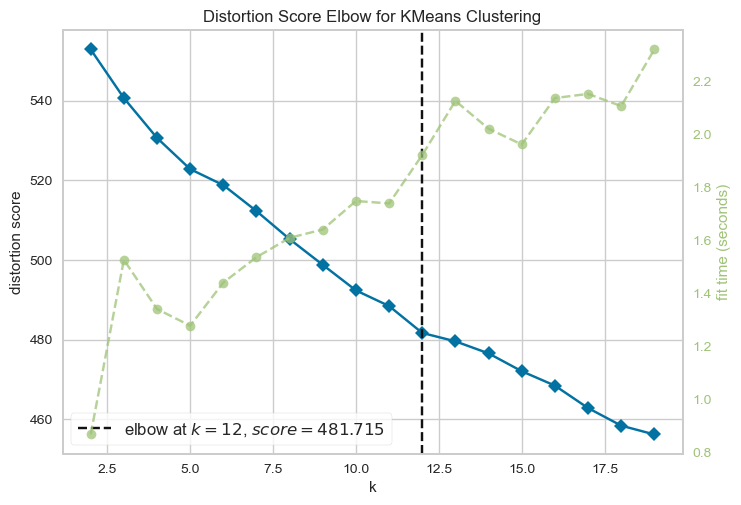

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

vzr = KElbowVisualizer(KMeans(max_iter=1000, random_state=10), k=(2, 20))
vzr.fit(norvec)
vzr.poof()

In [81]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans= KMeans(n_clusters=12, max_iter=1000, random_state=10) #최적 Topic 개수 12개를 기점으로 진행
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

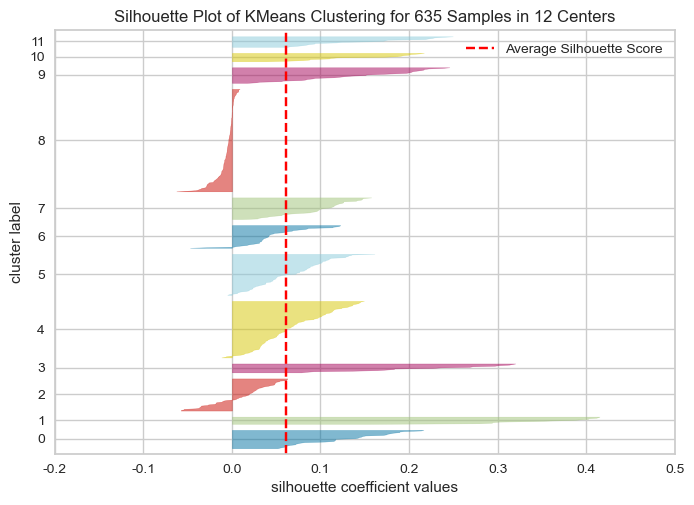

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 635 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
visualizer.fit(norvec)
visualizer.show()

In [83]:
topic_df = news_df[['언론사', '제목', '키워드']]

In [84]:
kmeans.fit(norvec)

labels = kmeans.labels_

topic_df['군집'] = labels

In [85]:
topic_df.groupby('군집').size()

군집
0      34
1      14
2      59
3      17
4     103
5      75
6      42
7      40
8     186
9      29
10     16
11     20
dtype: int64

In [103]:
topic_df.loc[topic_df['군집']==0, '군집'] = '경제'
topic_df.loc[topic_df['군집']==1, '군집'] = '리멤버 0715'
topic_df.loc[topic_df['군집']==2, '군집'] = '인하대 사건 그 이후'
topic_df.loc[topic_df['군집']==3, '군집'] = '인하대 입시'
topic_df.loc[topic_df['군집']==4, '군집'] = '인하대 사건 조사보도'
topic_df.loc[topic_df['군집']==5, '군집'] = '가해자 재판'
topic_df.loc[topic_df['군집']==6, '군집'] = '젠더 이슈'
topic_df.loc[topic_df['군집']==7, '군집'] = '가해자 체포'
topic_df.loc[topic_df['군집']==8, '군집'] = '관련 없는 기사'
topic_df.loc[topic_df['군집']==9, '군집'] = '학교 측 가해자 징계'
topic_df.loc[topic_df['군집']==10, '군집'] = '인하대 총장'
topic_df.loc[topic_df['군집']==11, '군집'] = '부고'

분석 결과, K-Means가 가장 Performance가 가장 좋았음

In [118]:
filter_list = ['경제', '인하대 입시', '관련 없는 기사', '인하대 총장', '부고']
inha_df = topic_df[~topic_df['군집'].isin(filter_list)]
inha_df.reset_index(drop = True, inplace = True)

In [120]:
inha_df.to_excel('./inha_topic.xlsx', index=False)

나머지 내용은 R을 이용하여 분석 진행

분석 결과를 Quarto 기반 보고서로 제작 예정